In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [14]:
def distanceBetweenPoints(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [15]:
def liniaB(x0, y0, xk, yk):
    data=np.zeros((200,200,3), dtype=np.uint8)
    data.fill(255)
    dx = xk-x0
    dy = yk-y0
    err = 0.0
    if (abs(dx) > abs(dy)):
        if(xk<x0):
            x0, xk = xk, x0
            y0, yk = yk, y0
            dx = xk-x0
            dy = yk-y0
        y=y0
        derr=abs(dy/dx)
        a= np.sign(dy)
        for x in range(x0, xk):
            data[y, x] = 0.0
            err += derr
            if (err > 0.5):
                y += a
                err += -1  
    else:
        if(yk<y0):
            y0, yk = yk, y0
            x0, xk = xk, x0
            dx = xk-x0
            dy = yk-y0
        x=x0
        derr=abs(dy/dx)
        a = np.sign(dx)
        for y in range(y0, yk):
            data[y, x] = 0.0
            err += derr
            if (err>0.5):
                x += a
                err += -1
    
    return data

In [16]:
def trojkatHeron(x1, y1, x2, y2, x3, y3, RGB, fill = 1):
    data = np.zeros((200, 200, 3), dtype=np.uint8)
    data.fill(255)
    
    ab = distanceBetweenPoints(x1, y1, x2, y2)
    bc = distanceBetweenPoints(x2, y2, x3, y3)
    ac = distanceBetweenPoints(x1, y1, x3, y3)
    pMain = (ab + bc + ac)/2
    FieldMain = math.sqrt(pMain*(pMain-ab)*(pMain-bc)*(pMain-ac))+1
    
    for i in range(min(x1, x2, x3), max(x1, x2, x3)):
        for j in range(min(y1, y2, y3), max(y1, y2, y3)):

            aq = distanceBetweenPoints(x1, y1, i, j)
            bq = distanceBetweenPoints(x2, y2, i, j)
            cq = distanceBetweenPoints(x3, y3, i, j)

            pABQ = (ab + bq + aq)/2
            pAQC = (ac + aq + cq)/2
            pQBC = (cq + bq + bc)/2

            FieldABQ = math.sqrt(pABQ*(pABQ-ab)*(pABQ-bq)*(pABQ-aq))
            FieldAQC = math.sqrt(pAQC*(pAQC-ac)*(pAQC-aq)*(pAQC-cq))
            FieldQBC = math.sqrt(pQBC*(pQBC-cq)*(pQBC-bq)*(pQBC-bc))

            if FieldMain > (FieldABQ + FieldAQC + FieldQBC):
                data[j, i] = RGB
    
    return data
            

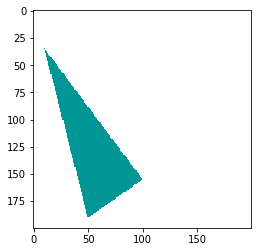

In [19]:
data = trojkatHeron(10, 35, 100, 155, 50, 190, (0, 150, 150), 0)
plt.imshow(data, interpolation='none', aspect=1)
plt.show()

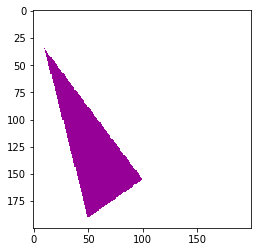

In [18]:
data = trojkatHeron(10, 35, 100, 155, 50, 190, (150, 0, 150), 0)
plt.imshow(data, interpolation='none', aspect=1)
plt.show()

In [9]:
def fillR(x, y, RGB):
    
    frcolor = 0
    bgcolor = 255
    if x>0 and x<len(RGB[0]) and y>0 and y<len(RGB):
        if RGB[y,x,0] == frcolor and RGB[y,x,1] == frcolor and RGB[y,x,2] == frcolor:
            return 0
        RGB[y,x] = frcolor
        fillR(x+1, y, RGB)
        fillR(x-1, y, RGB)
        fillR(x, y+1, RGB)
        fillR(x, y-1, RGB)

In [10]:
def trojkatRekursja(x1, y1, x2, y2, x3, y3, RGB, fill = 1):
    data = np.zeros((200, 200, 3), dtype=np.uint8)
    data.fill(255)
    
    data = np.add(liniaB(x1, y1, x2, y2), liniaB(x2, y2, x3, y3))
    return data

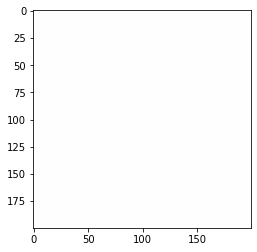

In [11]:
data = trojkatRekursja(10, 35, 50, 155, 120, 190, (150, 0, 150), 0)
plt.imshow(data, interpolation='none', aspect=1)
plt.show()